In [1]:
import sys
#sys.path.append("/home/fehrdelt/data_ssd/MedicalImaging_GIN/gradient_boosting")
#sys.path.append("/home/fehrdelt/data_ssd/MedicalImaging_GIN/gradient_boosting")

import os
#import lightgbm as lgb
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

from sklearn.manifold import TSNE
import umap

import matplotlib.pyplot as plt




/home/theotime/Documents/general_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#DATA_DIRECTORY = "/home/fehrdelt/data_ssd/data/clinical_data/Full/"
#DATA_DIRECTORY = "C:\\Users\\Rivage\\Documents\\1\\programmation\\PFE\\clinical_data\\Full\\"


#DATA_DIRECTORY = "/home/theotime/Documents/PFE_data/clinical_data/Full/"
DATA_DIRECTORY = "/home/theotime/Documents/PFE_data/clinical_data/Full_zones_mises_a_jour/"

In [10]:
# En excluant glasgow initial et moteur
X_volumes_clinical = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=list(range(2,22))+list(range(24,31)))
X_volumes_clinical.head()

,supratentorial_IPH,supratentorial_SAH,supratentorial_Petechiae,supratentorial_Edema,infratentorial_IPH,infratentorial_SAH,infratentorial_Petechiae,infratentorial_Edema,brainstem_IPH,brainstem_SAH,...,catecholamines,pression_arterielle_systolique_PAS_arrivee_du_smur,pression_arterielle_diastolique_PAD_arrivee_du_smur,anomalie_pupillaire_prehospitalier,frequence_cardiaque_FC_arrivee_du_smur,arret_cardio_respiratoire_massage,penetrant_objet,ischemie_du_membre,hemorragie_externe,amputation
0,0,342,0,0,0,15,0,0,0,0,...,0.0,87.0,49.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,100.0,60.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2,0,101,0,0,0,0,0,0,0,0,...,0.0,101.0,64.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0
3,0,328,0,0,0,0,0,0,0,0,...,0.0,110.0,71.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0
4,0,9,0,15,0,0,0,0,0,0,...,0.0,114.0,79.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_volumes_only = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,16))
X_volumes_only.head()

,supratentorial_IPH,supratentorial_SAH,supratentorial_Petechiae,supratentorial_Edema,infratentorial_IPH,infratentorial_SAH,infratentorial_Petechiae,infratentorial_Edema,brainstem_IPH,brainstem_SAH,brainstem_Petechiae,brainstem_Edema,SDH,EDH
0,0,342,0,0,0,15,0,0,0,0,0,0,43,0
1,0,0,0,0,0,0,0,0,0,0,0,0,312,11685
2,0,101,0,0,0,0,0,0,0,0,0,0,11,0
3,0,328,0,0,0,0,0,0,0,0,0,0,796,0
4,0,9,0,15,0,0,0,0,0,0,0,0,253,0


In [13]:
# En excluant glasgow initial et moteur
X_clinical_only = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=list(range(16,22))+list(range(24,31)))
X_clinical_only.head()

,age,hemocue_initial,fracas_du_bassin,catecholamines,pression_arterielle_systolique_PAS_arrivee_du_smur,pression_arterielle_diastolique_PAD_arrivee_du_smur,anomalie_pupillaire_prehospitalier,frequence_cardiaque_FC_arrivee_du_smur,arret_cardio_respiratoire_massage,penetrant_objet,ischemie_du_membre,hemorragie_externe,amputation
0,52.0,NaN,0.0,0.0,87.0,49.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
1,23.0,NaN,0.0,0.0,100.0,60.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2,42.0,13.1,0.0,0.0,101.0,64.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0
3,34.0,15.8,0.0,0.0,110.0,71.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0
4,22.0,NaN,0.0,0.0,114.0,79.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=[31])
y.head()

,outcome_neurochir_pic
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Drop rows where there is no outcome and impute missing values by median

In [15]:
nan_indexes = y.loc[pd.isna(y["outcome_neurochir_pic"]), :].index # indexes where there is a nan value.
print(nan_indexes)

y = y.dropna()
X_volumes_clinical = X_volumes_clinical.drop(nan_indexes)
X_clinical_only = X_clinical_only.drop(nan_indexes)
X_volumes_only = X_volumes_only.drop(nan_indexes)


Index([76, 102, 104, 113, 118, 125], dtype='int64')


In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy="median")

imp.fit(X_volumes_clinical)
X_volumes_clinical = imp.transform(X_volumes_clinical)

imp.fit(X_clinical_only)
X_clinical_only = imp.transform(X_clinical_only)

imp.fit(X_volumes_only)
X_volumes_only = imp.transform(X_volumes_only)

In [17]:
print(len(y))
print(len(X_volumes_clinical))
nb_total_samples = len(X_volumes_clinical)

495
495


In [10]:
y = y['outcome_neurochir_pic'].to_numpy()
y = [int(i) for i in y]

In [11]:
print(np.sum(y))
print(len(y)-np.sum(y))

42
453


In [12]:
FOLDS = 5
N_REPEATS = 3

In [13]:
print(len([False]*14 + [False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))
idx_categorical_features_clinical_only = [2, 3, 8, 10, 11, 12, 13, 14]
idx_categorical_features_volumes_clinical = [i+14 for i in idx_categorical_features_clinical_only]

29


Text(0, 0.5, 't_SNE component 2')

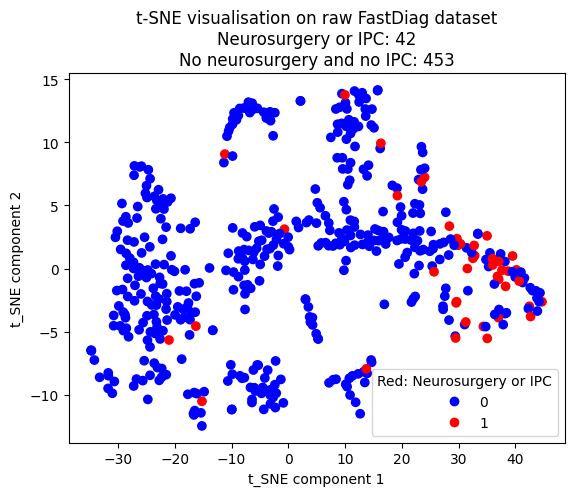

In [14]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results_raw = tsne.fit_transform(X_volumes_clinical)
fig, ax = plt.subplots()

scatter = ax.scatter(tsne_results_raw[:, 0], tsne_results_raw[:, 1], c=y, cmap='bwr')
plt.title(f't-SNE visualisation on raw FastDiag dataset\nNeurosurgery or IPC: {np.sum(y)}\nNo neurosurgery and no IPC: {len(y)-np.sum(y)}')
legend = ax.legend(*scatter.legend_elements(), title="Red: Neurosurgery or IPC")
plt.xlabel('t_SNE component 1')
plt.ylabel('t_SNE component 2')

Neurosurgery or IPC population: 42
No neurosurgery and no IPC population: 84


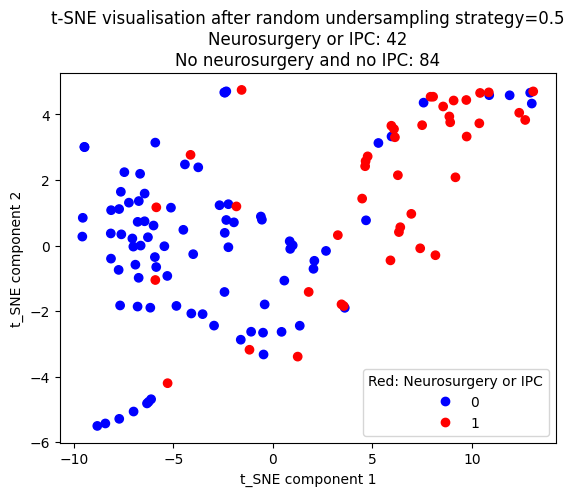

In [15]:

pipeline_visu_under = Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy=0.5))])
X_under_visu, y_under_visu = pipeline_visu_under.fit_resample(X_volumes_clinical, y)

#tsne = TSNE(n_components=2, random_state=42)
tsne_results_under = tsne.fit_transform(X_under_visu)

fig, ax = plt.subplots()

scatter = ax.scatter(tsne_results_under[:, 0], tsne_results_under[:, 1], c=y_under_visu, cmap='bwr')
plt.title(f't-SNE visualisation after random undersampling strategy=0.5\nNeurosurgery or IPC: {np.sum(y_under_visu)}\nNo neurosurgery and no IPC: {len(y_under_visu)-np.sum(y_under_visu)}')
legend = ax.legend(*scatter.legend_elements(), title="Red: Neurosurgery or IPC")
plt.xlabel('t_SNE component 1')
plt.ylabel('t_SNE component 2')

print(f"Neurosurgery or IPC population: {np.sum(y_under_visu)}")
print(f"No neurosurgery and no IPC population: {len(y_under_visu)-np.sum(y_under_visu)}")

Neurosurgery or IPC population: 226
No neurosurgery and no IPC population: 453


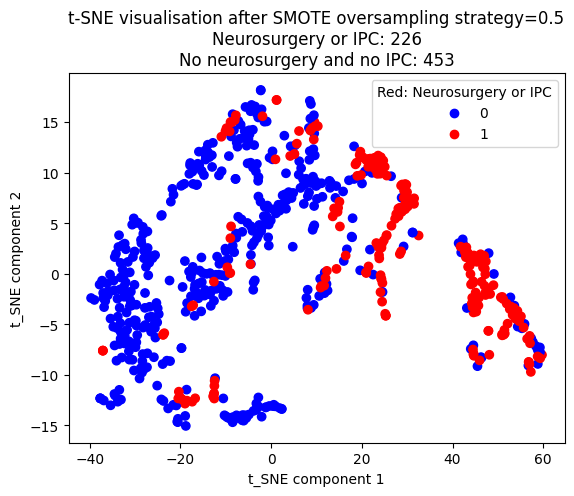

In [16]:

pipeline_visu_over = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.5))])
X_over_visu, y_over_visu = pipeline_visu_over.fit_resample(X_volumes_clinical, y)

#tsne = TSNE(n_components=2, random_state=42)
tsne_results_over = tsne.fit_transform(X_over_visu)

fig, ax = plt.subplots()

scatter = ax.scatter(tsne_results_over[:, 0], tsne_results_over[:, 1], c=y_over_visu, cmap='bwr')
plt.title(f't-SNE visualisation after SMOTE oversampling strategy=0.5\nNeurosurgery or IPC: {np.sum(y_over_visu)}\nNo neurosurgery and no IPC: {len(y_over_visu)-np.sum(y_over_visu)}')
legend = ax.legend(*scatter.legend_elements(), title="Red: Neurosurgery or IPC")
plt.xlabel('t_SNE component 1')
plt.ylabel('t_SNE component 2')

print(f"Neurosurgery or IPC population: {np.sum(y_over_visu)}")
print(f"No neurosurgery and no IPC population: {len(y_over_visu)-np.sum(y_over_visu)}")

#### Nested cross validation

In [17]:
X_volumes_clinical = pd.DataFrame(data=X_volumes_clinical, columns=pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,31)).columns)
X_volumes_only = pd.DataFrame(data=X_volumes_clinical, columns=pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,16)).columns)
X_clinical_only = pd.DataFrame(data=X_volumes_clinical, columns=pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(16,31)).columns)

In [18]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix

ftwo_scorer = make_scorer(fbeta_score, beta=2)

def confusion_matrix_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)

     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

def false_neg_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     
     return cm[1, 0]

def false_pos_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     
     return cm[0, 1]

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:

#inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
#outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)
pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1, k_neighbors=5)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14))])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=10, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "over__k_neighbors":[3,5,8], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_volumes_only, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Volumes only: Nested Cross Validation with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/l

Volumes only: Nested Cross Validation with hyperparameter gridsearch
AUC (max): 0.84 +- 0.06
F1 Score (max): 0.44 +- 0.09
F2 Score (max): 0.54 +- 0.12
Brier Score (min): 0.11 +- -0.02
False negative: 3% +- 1
False positive: 11% +- 4


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/l

In [21]:
clf.fit(X_volumes_only, y)
print(clf.best_params_)

{'model__learning_rate': 0.01, 'over__k_neighbors': 5, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.7}


In [22]:

#inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
#outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)
pipeline_smote_under = Pipeline(steps=[('over', SMOTENC(categorical_features=["fracas_du_bassin", "catecholamines", "anomalie_pupillaire_prehospitalier", "arret_cardio_respiratoire_massage", "penetrant_objet", "ischemie_du_membre", "hemorragie_externe", "amputation"])), 
                                       ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=10, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "over__k_neighbors":[3,5,8], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_clinical_only, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Prehospital data only: Nested Cross Validation with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/l

Prehospital data only: Nested Cross Validation with hyperparameter gridsearch
AUC (max): 0.85 +- 0.07
F1 Score (max): 0.5 +- 0.07
F2 Score (max): 0.64 +- 0.09
Brier Score (min): 0.11 +- -0.01
False negative: 2% +- 1
False positive: 12% +- 3


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/l

In [23]:
clf.fit(X_clinical_only, y)
print(clf.best_params_)

{'model__learning_rate': 0.01, 'over__k_neighbors': 8, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.7}


In [24]:

#inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
#outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)
pipeline_smote_under = Pipeline(steps=[('over', SMOTENC(categorical_features=["fracas_du_bassin", "catecholamines", "anomalie_pupillaire_prehospitalier", "arret_cardio_respiratoire_massage", "penetrant_objet", "ischemie_du_membre", "hemorragie_externe", "amputation"])), 
                                        ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=5, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "over__k_neighbors":[3,5,8], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_volumes_clinical, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Prehospital data & segmentation volumes: Nested Cross Validation with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 3375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theotime/Documents/general_env/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/theotime/Documents/general_env/l

Prehospital data & segmentation volumes: Nested Cross Validation with hyperparameter gridsearch
AUC (max): 0.88 +- 0.05
F1 Score (max): 0.48 +- 0.09
F2 Score (max): 0.6 +- 0.11
Brier Score (min): 0.1 +- -0.02
False negative: 2% +- 1
False positive: 10% +- 3


In [25]:
print(np.unique(X_clinical_only["catecholamines"]))

[0. 1.]


#### SHAP explaination for image lesion volumes and clinical data
- On ne fait plus de nested ici
- On split d'abord en sets de dev et test
- On fait GridSearchCV sur le set dev
- On fait un shap explaination sur le set de test.

In [ ]:
print(len(y))
print(np.sum(y))
rate = np.sum(y)/len(y)
print("rate = "+str(rate))

In [ ]:
print(X_volumes_clinical.shape)

In [26]:
# jeu de test: on prend environ 10% du jeu de données=50 samples
y_test = []
X_volumes_clinical_test = []

y_dev = []
X_volumes_clinical_dev = []

nb_target_positives = int(50*rate)
nb_target_negatives = 50-nb_target_positives

nb_filled_positives = 0
nb_filled_negatives = 0

for i,outcome in enumerate(y):
    if outcome == 0:
        if nb_filled_negatives<nb_target_negatives:
            y_test.append(outcome)
            X_volumes_clinical_test.append(X_volumes_clinical[i])
            nb_filled_negatives+=1
        else:
            y_dev.append(outcome)
            X_volumes_clinical_dev.append(X_volumes_clinical[i])
    elif outcome == 1:
        if nb_filled_positives<nb_target_positives:
            y_test.append(outcome)
            X_volumes_clinical_test.append(X_volumes_clinical[i])
            nb_filled_positives+=1
        else:
            y_dev.append(outcome)
            X_volumes_clinical_dev.append(X_volumes_clinical[i])

X_volumes_clinical_test = np.array(X_volumes_clinical_test)
X_volumes_clinical_dev = np.array(X_volumes_clinical_dev)

In [ ]:
pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=5, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2')
clf.fit(X_volumes_clinical_dev, y_dev)
print(clf.best_params_)

In [100]:
model = clf.best_estimator_.named_steps['model']

In [ ]:
import shap
shap.initjs()

In [ ]:
print(y_test)

In [103]:
volumes_and_clinical_columns = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,31)).columns

In [104]:
#shap_explainer = shap.TreeExplainer(model, data=pd.DataFrame(X_volumes_clinical_dev, columns=volumes_and_clinical_columns), model_output='probability')

shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer(pd.DataFrame(X_volumes_clinical_test, columns=volumes_and_clinical_columns))             # !!! est ce qu'il faut pas utiliser l'explainer sur des données séparées de l'entrainement ? genre là il faut le faire sur un jeu de test séparé

# !!!!!!!!! TODO il faut faire le SHAP sur un jeu de test séparé

In [ ]:
print(shap_values.shape)

In [ ]:
shap.plots.waterfall(shap_values[49]) 


# 9 brainstem edema
# Ischémie a toujours la même contribution quelle que soit sa valeur et c'est la plus grosse contribution. Bizzare


In [ ]:
print(model.predict(X_volumes_clinical_test))

In [ ]:
print(y_test[9])

In [ ]:
shap_kernel_explainer = shap.KernelExplainer(model_predict, X_clinical_only_train, link='logit')
shap_values_single = shap_kernel_explainer.shap_values(X_clinical_only_test.iloc[0,:])
shap.force_plot(shap_kernel_explainer.expected_value[0],np.array(shap_values_single[0]), X_clinical_only_test.iloc[0,:],link='logit')

In [ ]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=feature_names)
    return clf.best_estimator_.predict(data_asframe)

#### Same but without dealing with class imbalance

In [ ]:

#inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
#outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)
pipeline_smote_under = Pipeline(steps=[('model', HistGradientBoostingClassifier(categorical_features=[False]*14))])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=10, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_volumes_only, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Without reducing class imbalance: Volumes only: Nested Cross Validation with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


In [ ]:
clf.fit(X_volumes_only, y)
print(clf.best_params_)

In [ ]:

#inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
#outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)
pipeline_smote_under = Pipeline(steps=[('model', HistGradientBoostingClassifier(categorical_features=[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=10, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_clinical_only, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Without reducing class imbalance: Prehospital data only: Nested Cross Validation with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


In [ ]:
clf.fit(X_clinical_only, y)
print(clf.best_params_)

In [ ]:

#inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
#outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)
pipeline_smote_under = Pipeline(steps=[('model', HistGradientBoostingClassifier(categorical_features=[False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=5, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.1, 0.5, 1]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_volumes_clinical, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Without reducing class imbalance: Prehospital data & segmentation volumes: Nested Cross Validation with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


In [ ]:
clf.fit(X_volumes_clinical, y)
print(clf.best_params_)

#### Training without dealing with class imbalance

Clinical data only

In [ ]:
#model = DecisionTreeClassifier()
model = HistGradientBoostingClassifier(categorical_features=[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True])

cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=N_REPEATS, random_state=1)

#scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores = cross_validate(model, X_clinical_only, y, scoring=['roc_auc', 'recall_macro', 'f1'], cv=cv, n_jobs=-1)

#print(scores)

print("5 fold cross validation")
print(f'Mean ROC AUC: {np.mean(scores["test_roc_auc"])}, std: {np.std(scores["test_roc_auc"])}')
print(f'Mean recall macro: {np.mean(scores["test_recall_macro"])}, std: {np.std(scores["test_recall_macro"])}')
print(f'f1 score: {np.mean(scores["test_f1"])}, std: {np.std(scores["test_f1"])}')

Segmentation volumes and clinical data

In [ ]:
#model = DecisionTreeClassifier()
model = HistGradientBoostingClassifier(categorical_features=[False]*14 + [False, False, True, True, False, False, False, False, True, False, True, True, True, True, True])

cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=N_REPEATS, random_state=1)

#scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores = cross_validate(model, X_volumes_clinical, y, scoring=['roc_auc', 'recall_macro', 'f1'], cv=cv, n_jobs=-1)

#print(scores)

print("5 fold cross validation")
print(f'Mean ROC AUC: {np.mean(scores["test_roc_auc"])}, std: {np.std(scores["test_roc_auc"])}')
print(f'Mean recall macro: {np.mean(scores["test_recall_macro"])}, std: {np.std(scores["test_recall_macro"])}')
print(f'f1 score: {np.mean(scores["test_f1"])}, std: {np.std(scores["test_f1"])}')

#### With SMOTE oversampling and randomUnderSampling
SMOTE(sampling_strategy=0.1) & RandomUnderSampler(sampling_strategy=0.5)

Using imblearn.Pipeline, the over and undersampling is only applied during fit

In [ ]:
oversample = SMOTE()
pipeline_visu_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5))])
X_over_under_visu, y_over_under_visu = pipeline_visu_smote_under.fit_resample(X_volumes_clinical, y)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_over_under_visu)

fig, ax = plt.subplots()

scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_over_under_visu, cmap='bwr')
legend = ax.legend(*scatter.legend_elements(), title="Neurosurgery or no")
plt.xlabel('t_SNE component 1')
plt.ylabel('t_SNE component 2')

In [ ]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.6, n_components=2)
X_umap_over_under = umap_model.fit_transform(X_over_under_visu)


fig, ax = plt.subplots()

scatter = ax.scatter(X_umap_over_under[:, 0], X_umap_over_under[:, 1], c=y_over_under_visu, cmap='bwr')
legend = ax.legend(*scatter.legend_elements(), title="Neurosurgery or no")
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/grid_search.html 

In [ ]:
#pipeline = Pipeline(steps=[('over', SMOTE()), ('model', DecisionTreeClassifier())])
pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])

cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=N_REPEATS, random_state=1)

#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores_smote_undersampling = cross_validate(pipeline_smote_under, X_volumes_clinical, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=cv, n_jobs=-1)


print("Results on clinical data and segmentation volumes using scikit-learn HistGradientBoostingClassifier")
print(f"{int(nb_total_samples*(1-1/FOLDS))} train - {int(nb_total_samples/FOLDS)} test")
print("---------------------")
print(f"Variables: {len([False]*14+[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True])}")

roc_auc_metric = np.mean(scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)}')

f1_score = np.mean(scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)}')

f2_score = np.mean(scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)}')

brier_score = -np.mean(scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False negative %: {int(np.round(false_neg_score, 0))}%')

false_pos_score = np.mean(scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive %: {int(np.round(false_pos_score, 0))}%')

print("Execution time: < 10min")

In [ ]:
#pipeline = Pipeline(steps=[('over', SMOTE()), ('model', DecisionTreeClassifier())])
pipeline_smote_under = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier(categorical_features=[False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]))])

cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=N_REPEATS, random_state=1)

#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores_smote_undersampling = cross_validate(pipeline_smote_under, X_clinical_only, y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=cv, n_jobs=-1)


print("Results on clinical data only using scikit-learn HistGradientBoostingClassifier")
print(f"{int(nb_total_samples*(1-1/FOLDS))} train - {int(nb_total_samples/FOLDS)} test")
print("---------------------")
print(f"Variables: {len([False, False, True, True, False, False, False, False, True, False, True, True, True, True, True])}")

roc_auc_metric = np.mean(scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)}')

f1_score = np.mean(scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)}')

f2_score = np.mean(scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)}')

brier_score = -np.mean(scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False negative %: {int(np.round(false_neg_score, 0))}%')

false_pos_score = np.mean(scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive %: {int(np.round(false_pos_score, 0))}%')

print("Execution time: < 1s")

In [ ]:
print(nb_total_samples/FOLDS)

#### Test inference

In [ ]:
categorical = [False]*14 + [False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]
clf_clinical_volumes = HistGradientBoostingClassifier(categorical_features=categorical).fit(X_volumes_clinical_dev, y_dev)
y_pred = clf_clinical_volumes.predict(X_volumes_clinical_test)
print(y_pred)
print(classification_report(y_pred=y_pred, y_true=y_test))

In [ ]:
categorical = [False, False, True, True, False, False, False, False, True, False, True, True, True, True, True]
clf_clinical_only = HistGradientBoostingClassifier(categorical_features=categorical).fit(X_clinical_only_dev, y_dev)
y_pred = clf_clinical_only.predict(X_clinical_only_test)
print(y_pred)
print(classification_report(y_pred=y_pred, y_true=y_test))